# 0.) Import the Credit Card Fraud Data From CCLE

In [20]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [21]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [22]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON 441B ML Lab/W4/fraudTest.csv")

In [23]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [24]:
df['trans_date_trans_time'] = pd.to_datetime(df.trans_date_trans_time)
# select 4 columns
df_select = df[['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud']]

# If the hour is from 0 to 5
df_select['time_var'] = [i.hour for i in df.trans_date_trans_time]
df_select.time_var = np.where( (df_select.time_var >= 0) & (df_select.time_var <= 5), 1,0)
dummies = pd.get_dummies(df_select['category'])
X = pd.concat([dummies, df_select[['amt','city_pop','time_var']]],axis=1)
y = df_select['is_fraud']

<ipython-input-24-b2bac5995d5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['time_var'] = [i.hour for i in df.trans_date_trans_time]
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)

In [41]:
# sizes
print(X.shape)
print(y.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(555719, 17)
(555719,)
(389003, 17)
(166716, 17)
(389003,)
(166716,)


# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [33]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [43]:
# Three sets of training data
ros = RandomOverSampler(random_state=0)
over_X, over_y = ros.fit_resample(X_train, y_train)

ros = RandomUnderSampler(random_state=0)
under_X, under_y = ros.fit_resample(X_train, y_train)

ros = SMOTE(random_state=0)
smote_X, smote_y = ros.fit_resample(X_train, y_train)

In [53]:
print(over_X.shape)
print(under_X.shape)
print(smote_X.shape)

(774936, 17)
(3070, 17)
(774936, 17)


In [54]:
smote_X

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,amt,city_pop,time_var
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,28.480000,922,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,35.350000,106,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,12.650000,105638,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,46.820000,633,1
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,68.420000,804,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
774931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,839.718455,1946,0
774932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,285.717390,9997,0
774933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,945.685283,96942,0
774934,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18.247635,725,0


# 3.) Train three logistic regression models 

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

over_log = LogisticRegression().fit(over_X,over_y)
under_log = LogisticRegression().fit(under_X,under_y) 
smote_log = LogisticRegression().fit(smote_X,smote_y)

# 4.) Test the three models

In [63]:
# get prediction
y_pred_over = over_log.predict(X_test)
y_pred_under = under_log.predict(X_test)
y_pred_smote = smote_log.predict(X_test)

# 5.) Which performed best in Out of Sample metrics?

From the confusion matrices, accuracy, sensitivity, and specificity metrics, we can see that SMOTE oversample performs the best. It has the highes accuracy rate of 0.1724 compared to 0.1701 for normal oversample and 0.1722 for undersample. However, all the sampling methods had the same sensitivity rate of 0.9573 which means that they all performs the same in terms of discerning fraudulent transactions.

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score

# define a function to make confusion matrix
def make_confusion_matrix(trueV, predictedV):
    conf_mat = confusion_matrix(trueV, predictedV)

    fig, ax = plt.subplots(figsize=(2,2))
    ax.matshow(conf_mat, cmap=plt.cm.Reds, alpha=0.3)
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            ax.text(x=j, y=i,
            s=conf_mat[i, j],
            va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.show()

    # We can print other metrics 
    print(classification_report(trueV, predictedV, digits=3))

    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives

    cm1 = confusion_matrix(trueV, predictedV)
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    # NoInfoRate = max(df.y.sum()/df.y.count(), 1-df.y.sum()/df.y.count())
    print('Accuracy =', Accuracy)
    print('Specificity = ', Specificity)
    print('Sensitivity = ', Sensitivity)
    # print('No Information Rate = ', NoInfoRate)

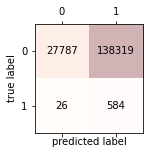

              precision    recall  f1-score   support

           0      0.999     0.167     0.287    166106
           1      0.004     0.957     0.008       610

    accuracy                          0.170    166716
   macro avg      0.502     0.562     0.147    166716
weighted avg      0.995     0.170     0.286    166716

Accuracy = 0.17017562801410782
Specificity =  0.16728474588515768
Sensitivity =  0.9573770491803278


In [73]:
# Performance of Oversample
make_confusion_matrix(y_test, y_pred_over)

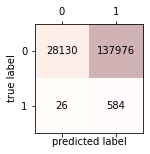

              precision    recall  f1-score   support

           0      0.999     0.169     0.290    166106
           1      0.004     0.957     0.008       610

    accuracy                          0.172    166716
   macro avg      0.502     0.563     0.149    166716
weighted avg      0.995     0.172     0.289    166716

Accuracy = 0.1722330190263682
Specificity =  0.16934969236511624
Sensitivity =  0.9573770491803278


In [74]:
# Performance of Undersample
make_confusion_matrix(y_test, y_pred_under)

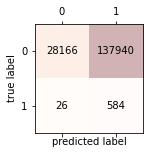

              precision    recall  f1-score   support

           0      0.999     0.170     0.290    166106
           1      0.004     0.957     0.008       610

    accuracy                          0.172    166716
   macro avg      0.502     0.563     0.149    166716
weighted avg      0.995     0.172     0.289    166716

Accuracy = 0.17244895510928765
Specificity =  0.16956642144172998
Sensitivity =  0.9573770491803278


In [75]:
# Performance of SMOTE
make_confusion_matrix(y_test, y_pred_smote)

# 6.) Pick two features and plot the two classes before and after SMOTE.

Text(0.5, 1.0, 'After SMOTE')

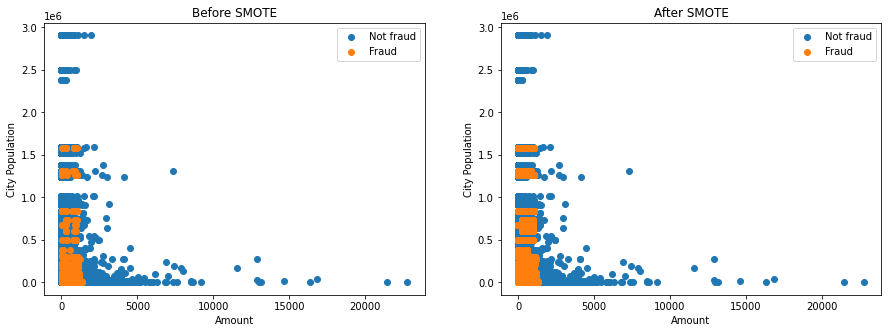

In [83]:
####### BEFORE
OG_data_temp = pd.concat([X_train, y_train], axis=1)

fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].scatter(OG_data_temp[OG_data_temp['is_fraud']==0]['amt'], OG_data_temp[OG_data_temp['is_fraud']==0]['city_pop'])
ax[0].scatter(OG_data_temp[OG_data_temp['is_fraud']==1]['amt'], OG_data_temp[OG_data_temp['is_fraud']==1]['city_pop'])

ax[0].set_xlabel('Amount')
ax[0].set_ylabel('City Population')
ax[0].legend(['Not fraud', 'Fraud'])
ax[0].set_title('Before SMOTE')

####### AFTER
OG_data_temp = pd.concat([smote_X, smote_y], axis=1)

ax[1].scatter(OG_data_temp[OG_data_temp['is_fraud']==0]['amt'], OG_data_temp[OG_data_temp['is_fraud']==0]['city_pop'])
ax[1].scatter(OG_data_temp[OG_data_temp['is_fraud']==1]['amt'], OG_data_temp[OG_data_temp['is_fraud']==1]['city_pop'])

ax[1].set_xlabel('Amount')
ax[1].set_ylabel('City Population')
ax[1].legend(['Not fraud', 'Fraud'])
ax[1].set_title('After SMOTE')